Dependencies and starter code

Observations:
1. The number of data points per drug regimen group were not equal. Capomulin and Ramicane had the most amount of data points and they were also a part of the top four most promising treatment regimens. Their inclusion in this category may be because there was a larger data set of points thus allowing for greater accuracy when analyzing their efficacy and promising nature. 
2. Capomulin seems to be the most effective drug regimen because it greatly reduced tumor volume as it has the lowest mean tumor volume and the second lowest SEM. 
3. Tumor volume is positively correlated to mouse weight for a mouse that is treated with Capomulin. This is supported by the R value of this relationship being, +0.96. 

In [417]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
combined_mouse = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Summary statistics

In [467]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Regimens = combined_mouse.groupby(["Drug Regimen"])
Regimens

regimen_mean = Regimens["Tumor Volume (mm3)"].mean()
regimen_median = Regimens["Tumor Volume (mm3)"].median()
regimen_variance = Regimens["Tumor Volume (mm3)"].var()
regimen_std = Regimens["Tumor Volume (mm3)"].std()
regimen_sem = Regimens["Tumor Volume (mm3)"].sem()

In [468]:
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar plots

In [469]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_data_points = Regimens.count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

(0, 240)

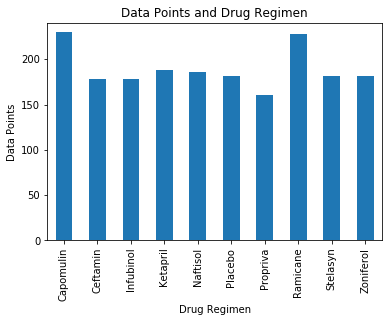

In [421]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
bar_regimen = regimen_data_points.plot(kind='bar')
plt.title("Data Points and Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.ylim(0, 240)

(0, 250)

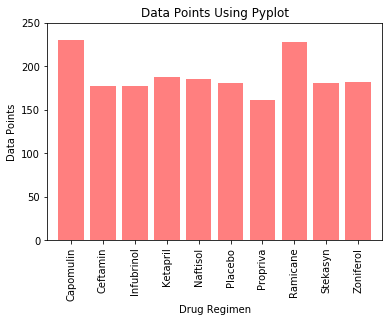

In [422]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = [230, 178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis, data_points, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubrinol", "Ketapril","Naftisol", "Placebo","Propriva","Ramicane","Stekasyn","Zoniferol"],rotation='vertical')

plt.title("Data Points Using Pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, 250)


Pie Plots

In [423]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_mouse.groupby("Sex")["Mouse ID"].nunique()
gender_count.head()

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [424]:
total_count = len(combined_mouse["Mouse ID"].unique())
total_count

249

In [425]:
gender_percent = (gender_count/total_count)*100
gp= gender_percent.round(2)

In [426]:
gender_df = pd.DataFrame({"Sex Count":gender_count,
                        "Sex Percentage":gp})
                                            
gender_df

,Sex Count,Sex Percentage
Sex,,
Female,124,49.8
Male,125,50.2


Text(0.5, 1.0, 'Percentage of Female vs. Male Mice Using Pandas')

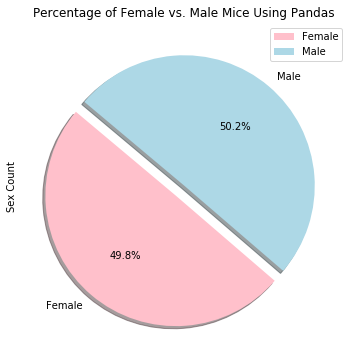

In [427]:
colors = ['pink', 'lightblue']
explode = (0.1, 0)
plot = gender_df.plot.pie(y="Sex Count",figsize=(6,6), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title("Percentage of Female vs. Male Mice Using Pandas")

In [428]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

C:\Users\rimsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


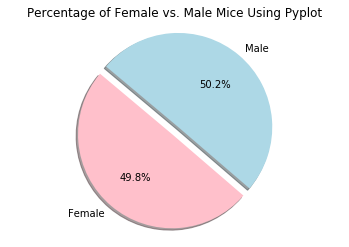

In [429]:
sex = ["Female","Male"]
sex_percent = [gp]
colors = ["pink","lightblue"]
explode = (0.1,0)
plt.pie(sex_percent, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Female vs. Male Mice Using Pyplot")
plt.show()

Quartiles, outliers and boxplots

In [430]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_4 = combined_mouse[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_4
top_four = top_4.sort_values("Timepoint", ascending=False)
top_four.head(4)


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1892,Naftisol,z969,45,73.867845
337,Capomulin,j119,45,38.125164
1444,Placebo,q787,45,66.096475
272,Ramicane,d251,45,37.311236


In [431]:
tumor_naftisol= top_four.loc[(top_four["Drug Regimen"] == "Naftisol") |  (top_four["Timepoint"] == "45"),:]
tumor_naftisol

C:\Users\rimsh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1892,Naftisol,z969,45,73.867845
1215,Naftisol,n304,45,63.586395
1465,Naftisol,r604,45,62.670759
1475,Naftisol,r701,45,69.778544
1571,Naftisol,t724,45,75.113288
...,...,...,...,...
1133,Naftisol,l700,0,45.000000
1206,Naftisol,n304,0,45.000000
1641,Naftisol,v835,0,45.000000
1143,Naftisol,l725,0,45.000000


In [432]:
quartiles = tumor_naftisol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)  

28.270133771249995
78.97877414125


In [433]:
outliers = []
for vol in tumor_naftisol:
    for row in tumor_naftisol["Tumor Volume (mm3)"]:
        if row > upper_bound:
            print (f'{row} is an outlier')
        if row < lower_bound:
            print(f'{row} is an outlier')
        else:
            print(f"This mouse is not an outlier for Drug Regimen Naftisol")

This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse is not an outlier for Drug Regimen Naftisol
This mouse

In [434]:
tumor_capomulin= top_four.loc[(top_four["Drug Regimen"] == "Capomulin") |  (top_four["Timepoint"] == "45"),:]
tumor_capomulin

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
337,Capomulin,j119,45,38.125164
282,Capomulin,l897,45,38.846876
299,Capomulin,b742,45,38.939633
309,Capomulin,b128,45,38.982878
350,Capomulin,v923,45,40.658124
...,...,...,...,...
135,Capomulin,m957,0,45.000000
125,Capomulin,r554,0,45.000000
115,Capomulin,y793,0,45.000000
431,Capomulin,i557,0,45.000000


In [435]:
quartiles = tumor_capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

26.714832162499995
55.9711007025


In [436]:
for vol in tumor_capomulin:
    for row in tumor_capomulin["Tumor Volume (mm3)"]:
        if row < lower_bound:
            print(f'{row} is an outlier')
        if row > upper_bound:
            print(f'{row} is an outlier')
        else:
            print("This mouse is not an outlier for Drug Regimen Capomulin")


This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Capomulin
This mouse is not an outlier for Drug Regimen Ca

In [437]:
tumor_placebo = top_four.loc[(top_four["Drug Regimen"] == "Placebo") |  (top_four["Timepoint"] == "45"),:]
tumor_placebo


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1444,Placebo,q787,45,66.096475
1304,Placebo,o795,45,73.059454
1561,Placebo,t718,45,63.423695
577,Placebo,a897,45,72.255963
784,Placebo,e227,45,73.212939
...,...,...,...,...
1229,Placebo,n763,0,45.000000
1617,Placebo,v409,0,45.000000
1671,Placebo,w167,0,45.000000
1646,Placebo,v989,0,45.000000


In [438]:
quartiles = tumor_placebo['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

28.772230604999994
78.603756725


In [439]:
for vol in tumor_placebo:
    for row in tumor_placebo["Tumor Volume (mm3)"]:
        if row < lower_bound:
            print(f'{row} is an outlier')
        if row > upper_bound:
            print(f'{row} is an outlier')
        else:
            print("This mouse is not an outlier for Drug Regimen Placebo")

This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier

This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier

In [440]:
tumor_ramicane= top_four.loc[(top_four["Drug Regimen"] == "Ramicane") |  (top_four["Timepoint"] == "45"),:]
tumor_ramicane


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
272,Ramicane,d251,45,37.311236
327,Ramicane,a411,45,38.407618
114,Ramicane,n364,45,31.095335
400,Ramicane,e662,45,40.659006
254,Ramicane,i334,45,36.374510
...,...,...,...,...
165,Ramicane,a644,0,45.000000
450,Ramicane,y449,0,45.000000
448,Ramicane,w678,0,45.000000
441,Ramicane,r921,0,45.000000


In [441]:
quartiles = tumor_ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

24.18658646249998
57.48804812250001


In [442]:
for vol in tumor_ramicane:
    for row in tumor_ramicane["Tumor Volume (mm3)"]:
        if row < lower_bound:
            print(f'{row} is an outlier')
        if row > upper_bound:
            print(f'{row} is an outlier')
        else:
            print("This mouse is not an outlier for Drug Regimen Placebo")

This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
22.05012627 is an outlier
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
Th

This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier

This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier for Drug Regimen Placebo
This mouse is not an outlier

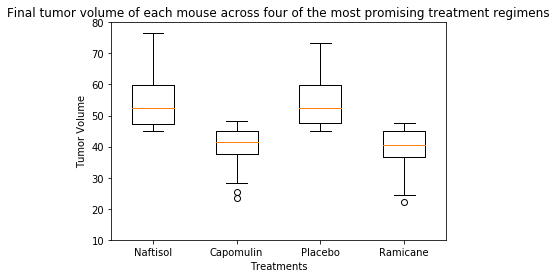

In [443]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

naftisol_vol = tumor_naftisol["Tumor Volume (mm3)"]
capomulin_vol = tumor_capomulin["Tumor Volume (mm3)"]
placebo_vol = tumor_placebo["Tumor Volume (mm3)"]
ramicane_vol = tumor_ramicane["Tumor Volume (mm3)"]
naf = plt.boxplot(naftisol_vol,positions = [1],widths= 0.5)
cap = plt.boxplot(capomulin_vol,positions = [2],widths = 0.5)
plac = plt.boxplot(placebo_vol,positions = [3],widths = 0.5)
ram = plt.boxplot(ramicane_vol,positions = [4],widths =0.5)
plt.title("Final tumor volume of each mouse across four of the most promising treatment regimens")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatments")
plt.xticks([1, 2, 3,4], ['Naftisol', 'Capomulin', 'Placebo','Ramicane'])
plt.ylim(10, 80)
plt.show()

Line and scatter plots

In [444]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = combined_mouse.loc[(combined_mouse["Mouse ID"] == "j119"),:]
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1
333,j119,Capomulin,Female,7,23,25,42.417166,1
334,j119,Capomulin,Female,7,23,30,43.013681,1
335,j119,Capomulin,Female,7,23,35,43.765705,1
336,j119,Capomulin,Female,7,23,40,44.585090,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


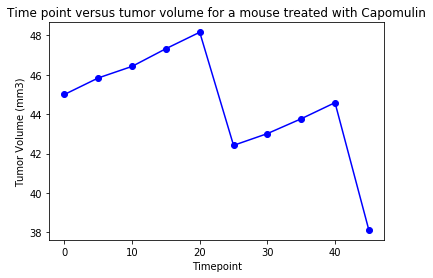

In [462]:
x_axis = cap_mouse["Timepoint"]
y_axis = cap_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis, marker ='o', color='blue')
plt.title("Time point versus tumor volume for a mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [446]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = combined_mouse[["Mouse ID","Weight (g)", "Tumor Volume (mm3)","Drug Regimen"]]
cap_df

,Mouse ID,Weight (g),Tumor Volume (mm3),Drug Regimen
0,k403,16,45.000000,Ramicane
1,k403,16,38.825898,Ramicane
2,k403,16,35.014271,Ramicane
3,k403,16,34.223992,Ramicane
4,k403,16,32.997729,Ramicane
...,...,...,...,...
1888,z969,30,63.145652,Naftisol
1889,z969,30,65.841013,Naftisol
1890,z969,30,69.176246,Naftisol
1891,z969,30,70.314904,Naftisol


In [447]:
cap_scatter = cap_df.loc[(cap_df["Drug Regimen"] == "Capomulin"),:]
cap_scatter

,Mouse ID,Weight (g),Tumor Volume (mm3),Drug Regimen
10,s185,17,45.000000,Capomulin
11,s185,17,43.878496,Capomulin
12,s185,17,37.614948,Capomulin
13,s185,17,38.177232,Capomulin
14,s185,17,36.866876,Capomulin
...,...,...,...,...
440,i557,24,47.685963,Capomulin
1452,r157,25,45.000000,Capomulin
1453,r157,25,45.597064,Capomulin
1454,r157,25,46.059608,Capomulin


In [448]:
cap_weight = cap_scatter.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
cap_weight

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [449]:
cap_weight_df = pd.DataFrame(cap_weight)
cap_weight_df

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


In [450]:
capo_final = pd.DataFrame(cap_weight_df).reset_index()
capo_final

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


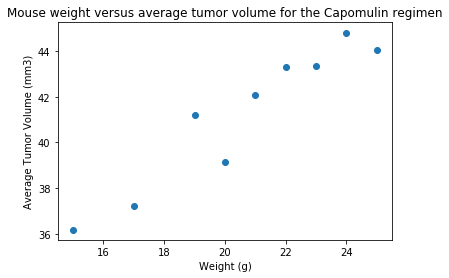

In [451]:
plt.scatter(x=capo_final['Weight (g)'], y=capo_final['Tumor Volume (mm3)'])
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The r-squared is: 0.950524396185527


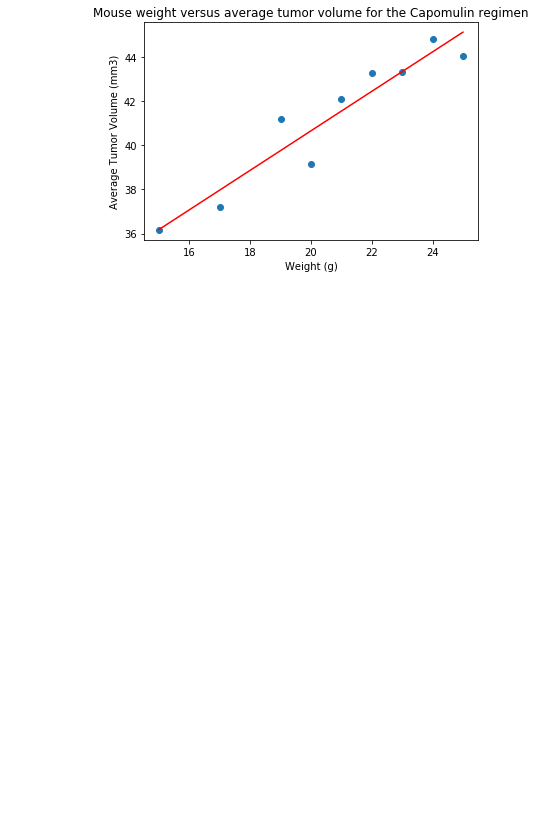

In [465]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_final["Weight (g)"]
y_values = capo_final["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
print(f"The r-squared is: {rvalue}")
plt.show()